<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D1%80%D1%82%D1%8B%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B2%D0%B8%D0%B4%D0%B5_%D0%B2%D0%B5%D0%B1_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A/B-тестирование

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# cwd = os.getcwd()
# print(cwd)

Mounted at /content/drive


**кейс**: нужно увеличить конверсию добавления товара в корзину пользователями приложения Ozon. Команда предположила, что обычных фотографий товара может не хватать для принятия решений. Поэтому было решено переместить фотографии покупателей вместе с отзывами в верхнюю часть карточки товара.

Исследование всегда начинается с выдвижения гипотезы. Напомним, гипотеза — это утверждение, предполагающее доказательство.

При формировании гипотезы мы сразу высказываем предположение о том, как реализация проекта повлияет на метрики.

**Метрика** — численное отображение целевого показателя. Это может быть значение конверсии, среднего чека, посещаемости заведения и так далее. Метрика позволяет нам от субъективных оценок «хорошо» и «плохо» перейти к конкретным числам.

**Пример** составления гипотезы: Конкретное изменение X повлияет на метрику Y на Z единиц.

В случае с кейсом Ozon гипотеза звучала следующим образом: «Заданное на второй картинке расположение фотографий (X) увеличит конверсию добавления товара в корзину с карточки товара (Y) на 2 % (Z)».

Итак, возникает вопрос: каким образом можно проверить данную гипотезу? Как с определённой долей уверенности убедиться в том, что она является истинной?

### Кому нужно A/B-тестирование
* Продакт-менеджеры могут тестировать изменения ценовых моделей, направленные на повышение доходов, или оптимизацию части воронки продаж для увеличения конверсии.

* Маркетологи могут тестировать изображения, призывы к действию (call-to-action) или практически любые другие элементы маркетинговой кампании или рекламы с точки зрения улучшения метрик.

* Продуктовые дизайнеры могут тестировать дизайнерские решения (например, цвет кнопки оформления заказа) или использовать результаты тестирования для того, чтобы перед внедрением определить, будет ли удобно пользоваться новой функцией.

#### 1. Определите цели
Определите основные бизнес-задачи вашей компании и убедитесь, что цели A/B-тестирования с ними совпадают.

**Пример**: Допустим, вы менеджер продукта в «компании X» на стадии стартапа. Руководству нужно добиться роста количества пользователей. В частности, компания стремится к росту количества активных пользователей (метрика DAU), определяемых как среднее количество зарегистрированных пользователей сайта в день за последние 30 дней. Вы предполагаете, что этого можно добиться либо путем улучшения показателей удержания (процент пользователей, возвращающихся для повторного использования продукта), либо путем увеличения числа новых регистрирующихся пользователей.

В процессе исследования воронки вы замечаете, что 60% пользователей уходят до завершения регистрации. Это означает, что можно повысить количество регистраций, изменив страницу регистрации, что, в свою очередь, должно помочь увеличить количество активных пользователей.

#### 2. Определите метрику
Затем вам нужно определить метрику, на которую вы будете смотреть, чтобы понять, являетс
я ли новая версия сайта более успешной, чем изначальная. Обычно в качестве такой метрики берут коэффициент конверсии, но можно выбрать и промежуточную метрику вроде показателя кликабельности (CTR).

**Пример**: В нашем примере в качестве метрики вы выбираете долю зарегистрированных пользователей (registration rate), определяемую как количество новых пользователей, которые регистрируются, поделенное на общее количество новых посетителей сайта.

#### 3. Разработайте гипотезу
Затем нужно разработать гипотезу о том, что именно поменяется, и, соответственно, что вы хотите проверить. Нужно понять, каких результатов вы ожидаете и какие у них могут быть обоснования.

**Пример**: Допустим, на текущей странице регистрации есть баннер и форма регистрации. Есть несколько пунктов, которые вы можете протестировать: поля формы, позиционирование, размер текста, но баннер на главной странице визуально наиболее заметен, поэтому сначала надо узнать, увеличится ли доля регистраций, если изменить изображение на нём.

Общая гипотеза заключается в следующем: «Если изменить главную страницу регистрации, то больше новых пользователей будут регистрироваться внутри продукта, потому что новое изображение лучше передает его ценности».

Нужно определить две гипотезы, которые помогут понять, является ли наблюдаемая разница между версией A (изначальной) и версией B (новой, которую вы хотите проверить) случайностью или результатом изменений, которые вы произвели.

* Нулевая гипотеза предполагает, что результаты, А и В на самом деле не отличаются и что наблюдаемые различия случайны. Мы надеемся опровергнуть эту гипотезу.

* Альтернативная гипотеза — это гипотеза о том, что B отличается от A, и вы хотите сделать вывод об её истинности.

Решите, будет ли это односторонний или двусторонний тест. Односторонний тест позволяет обнаружить изменение в одном направлении, в то время как двусторонний тест позволяет обнаружить изменение по двум направлениям (как положительное, так и отрицательное).

#### 4. Подготовьте эксперимент
Для того, чтобы тест выдавал корректные результаты сделайте следующее:

* Создайте новую версию (B), отражающую изменения, которые вы хотите протестировать.

* Определите контрольную и экспериментальную группы. Каких пользователей вы хотите протестировать: всех пользователей на всех платформах или только пользователей из одной страны? Определите группу испытуемых, отобрав их по типам пользователей, платформе, географическим показателям и т. п. Затем определите, какой процент исследуемой группы составляет контрольная группа (группа, видящая версию A), а какой процент — экспериментальная группа (группа, видящая версию B). Обычно эти группы одинакового размера.

* Убедитесь, что пользователи будут видеть версии A и B в случайном порядке. Это значит, у каждого пользователя будет равный шанс получить ту или иную версию.

* Определите уровень статистической значимости (α). Это уровень риска, который вы принимаете при ошибках первого рода (отклонение нулевой гипотезы, если она верна), обычно α = 0.05. Это означает, что в 5% случаев вы будете обнаруживать разницу между A и B, которая на самом деле обусловлена случайностью. Чем ниже выбранный вами уровень значимости, тем ниже риск того, что вы обнаружите разницу, вызванную случайностью.

* Определите минимальный размер выборки. Калькуляторы есть здесь и здесь, они рассчитывают размер выборки, необходимый для каждой версии. На размер выборки влияют разные параметры и ваши предпочтения. Наличие достаточно большого размера выборки важно для обеспечения статистически значимых результатов.

* Определите временные рамки. Возьмите общий размер выборки, необходимый вам для тестирования каждой версии, и разделите его на ваш ежедневный трафик, так вы получите количество дней, необходимое для проведения теста. Как правило, это одна или две недели.

**Пример**: На существующем сайте в разделе регистрации мы изменим главную страницу — это и будет нашей версией B. Мы решаем, что в эксперименте будут участвовать только новые пользователи, заходящие на страницу регистрации. Мы также обеспечиваем случайную выборку, то есть каждый пользователь будет иметь равные шансы получить A или B, распределенные случайным образом.

Важно определить временные рамки. Допустим, ежедневно на нашу страницу регистрации в среднем приходит трафик от 10 000 новых пользователей, это означает, что только 5000 пользователей могут увидеть каждую версию. Тогда минимальный размер выборки составляет около 100 000 просмотров каждой версии. 100 000/ 5000 = 20 дней — столько должен продлиться эксперимент.

#### 5. Проведите эксперимент
Помните о важных шагах, которые необходимо выполнить:

— Обсудите параметры эксперимента с исполнителями.

— Выполните запрос на тестовой закрытой площадке, если она у вас есть. Это поможет проверить данные. Если ее нет, проверьте данные, полученные в первый день эксперимента.

— В самом начале проведения тестирования проверьте, действительно ли оно работает.

— И, наконец, не смотрите на результаты! Преждевременный просмотр результатов может испортить статистическую значимость.

#### 6. Анализируйте результаты. Наконец-то самое интересное
Вам нужно получить данные и рассчитать значения выбранной ранее метрики успеха для обеих версий (A и B) и разницу между этими значениями. Если не было никакой разницы в целом, вы также можете сегментировать выборку по платформам, типам источников, географическим параметрам и т. п., если это применимо. Вы можете обнаружить, что версия B работает лучше или хуже для определенных сегментов.

Проверьте статистическую значимость. Это определяется путем сравнения тестовых статистических данных (и полученного p-значения) с вашим уровнем значимости.

* Если p-значение меньше уровня значимости, то можно отвергнуть нулевую гипотезу, имея доказательства для альтернативы.

* Если p-значение больше или равно уровню значимости, мы не можем отвергнуть нулевую гипотезу о том, что A и B не отличаются друг от друга.

A/B-тестирование может дать следующие результаты:

* Контрольная версия, А выигрывает или между версиями нет разницы. Если исключить причины, которые могут привести к недействительному тестированию, то проигрыш новой версии может быть вызван, например, плохим сообщением и брендингом конкурентного предложения или плохим клиентским опытом.

В этом сценарии вы можете углубиться в данные или провести исследование пользователей, чтобы понять, почему новая версия не работает так, как ожидалось. Это, в свою очередь, поможет собрать информацию для следующих тестов.

* Версия B выигрывает. A/B-тест подтвердил вашу гипотезу о лучшей производительности версии B по сравнению с версией A. Отлично! Опубликовав результаты, вы можете провести эксперимент на всей аудитории и получить новые результаты.

### Описание задачи

Проводится A/B-тестирование для двух вариантов рекомендаций сопутствующих товаров в профиле товара некоторого интернет-магазина.

**Вариант 1.** Дополнительные товары рекомендуются на основе статистических данных уже совершённых покупок — товары, которые другие пользователи часто покупают с основным.

**Вариант 2.** Дополнительные товары рекомендуются на основе совершённых пользователем ранее покупок с помощью ML-модели.
Варианты сравниваются по доле пользователей, которые добавляют хотя бы один из предложенных товаров в корзину (метрикой является конверсия действия «добавить в корзину сопутствующий товар»).

Для этого пользователи были разделены на две группы.

* Контрольной (группе А) доступен первый вариант рекомендаций.
* Тестовой (группе B) доступен второй вариант.
Предполагается, что все условия и принципы проведения A/B-теста были соблюдены, то есть:

    * выборка имеет достаточный для принятия решения объём;

    * выбран достаточный интервал времени для тестирования;

    * группы максимально сбалансированы;

    * внешнее вмешательство минимально.

In [ ]:
ab_data = pd.read_csv('drive/MyDrive/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


* user_id - идентификатор пользователя, зашедшего на сайт
* timestamp	- дата события
* group	- группа теста (контрольная или тестовая)
* converted - совершил пользователь целевое действие (нажатие кнопки «добавить в корзину» на сопутствующем товаре) или нет. 1 — да, 0 — нет.

In [ ]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [ ]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


В итоге мы получили таблицу, в которой отображены входы клиента на сайт (сессия) и его действия. Для того, чтобы получить показатель конверсии в группах на каждый день, нам необходимо предварительно сгруппировать наши данные по дате и группе и вычислить количество пользователей, заходивших на сайт, и суммарное количество совершённых целевых действий.

Дополнительно для удобства сбросим индекс на сгруппированной таблице c помощью метода reset_index() и переименуем столбец user_id в users_count с помощью метода rename().

In [ ]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})

daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


Примечание. Количество пользователей в день в контрольной и тестовой группе определяется как количество значений в столбце user_id в сгруппированных данных, а количество совершённых целевых действий — это просто сумма по столбцу converted (1 в строке означает положительный исход, то есть целевое действие было совершено, а 0 — отрицательный исход; просуммировав все 1 и 0 в группе, получим количество положительных исходов).


Для завершения этапа подготовки данных к анализу нам осталось рассчитать конверсию на каждый день проведения A/B-тестирования. Напомним: ежедневная конверсия рассчитывается как отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия в день, к ежедневному общему числу посетителей сайта, умноженная на 100 %:

In [ ]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count'] * 100
daily_data.head()

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


Нам необходимо ответить на вопрос: в какой группе (А или B) показатель конверсии был выше, и на этой основе принять решение о том, какой из вариантов более эффективный.

Давайте построим диаграмму boxplot для сравнения параметров распределения ежедневной конверсии по группам.

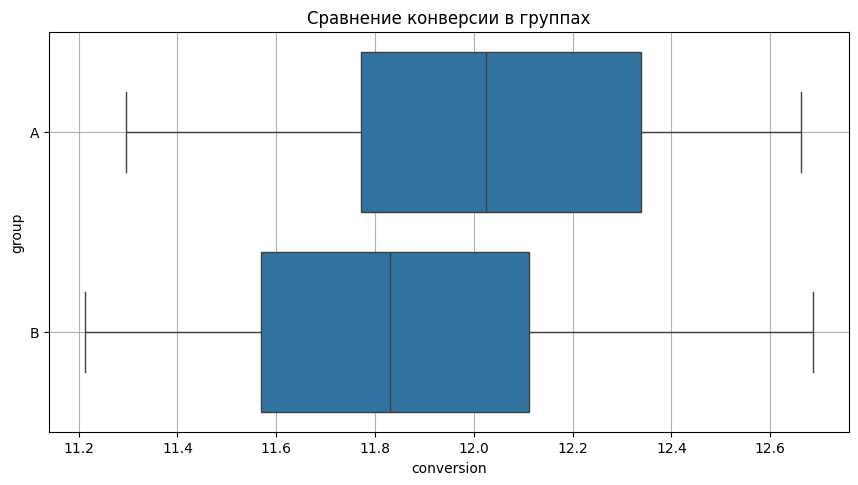

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax)
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid(True);


# Во-первых, медианное значение ежедневной конверсии в группе А, выше, чем в группе B.
# Во-вторых, разброс конверсии в группе B несколько больше, чем в группе A.

Прежде чем делать выводы по визуальному представлению данных, всегда обращайте внимание на численные значения показателей. Они могут различаться в масштабе графика, но на практике разница между ними не будет иметь значения. Также всегда стоит убедиться, что в данных нет выбросов (базовый вариант — сравнить медиану и среднее между собой).

In [ ]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
conversion_piv
# Из полученной таблицы видно, что медиана и среднее в каждой группе практически совпадают. При этом разница между показателями в группах менее 0.3 %!

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


* Значима ли вообще такая разница в показателях или она обусловлена случайностью, и варианты A и B одинаково эффективны по метрике конверсии?
* Вопрос о стабильности метрик является обязательным. Прогонять результаты через статистические тесты можно только после того, как вы убедитесь, что разница в ваших показателях стабилизировалась во времени.

В течение всего теста рекомендуется отслеживать поведение целевых метрик. Для этого чаще всего используются кумулятивные метрики.

**Кумулятивная метрика** — это отображение целевой метрики, когда вы отслеживаете её поведение за каждый день — накопленным итогом по дням.



Ранее мы говорили, что для принятия решения в A/B-тестировании требуется большой объём данных, что соотносится с законом больших чисел: чем больше данных — тем ближе получаемый результат к математическому ожиданию (истинному среднему).

Пример про подбрасывание монетки. Если подбросить монетку 10 раз, то велика вероятность, что один из двух результатов будет значительно превышать второй. Но если подбросить её 1 000 раз, то результаты компенсируют друг друга, и мы увидим, что итог крайне близок к разделению 50/50 (количество выпавших орлов и решек будет практически одинаковым).

Так же и в A/B-тестировании: с самого начала любой из вариантов может показывать лучшие результаты, и статистическая значимость может быть достигнута уже в первые дни теста. Это явление называется проблемой подглядывания.

**Важно**! Не стоит торопиться: как минимум дождитесь накопления запланированных объёмов выборки и длительности теста. Но и тут не стоит заканчивать тест — проверьте, стабилизировались ли метрики!

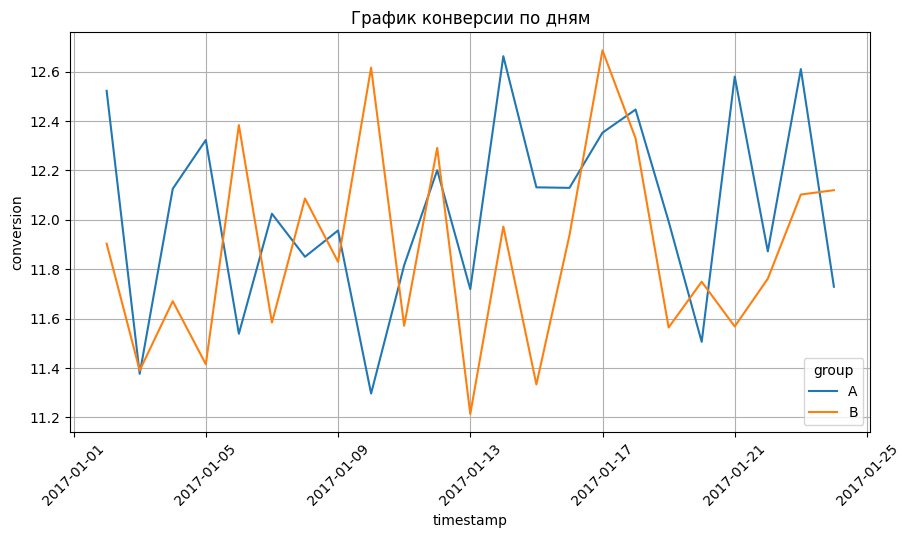

In [ ]:
# для начала ради эксперимента посмотрим, как вообще изменялись показатели ежедневной конверсии в
# каждой группе во времени. Для этого построим линейные графики для каждой группы: по оси абсцисс
# отложим дату, а по оси ординат — показатель конверсии:

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

Конверсия у обеих групп «скачет» день ото дня. Понять, какая из групп лучше, — практически невыполнимая задача.

Именно поэтому и принято смотреть график кумулятивной конверсии, где за каждый день отображаются данные накопленным итогом.

Для расчёта кумулятивного показателя суммы в Pandas есть специальный метод cumsum(). Давайте посмотрим, как он работает — сначала на данных о ежедневном количестве посетителей для группы А.




In [ ]:
# Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count,
# в который запишем результат работы метода cumsum() по столбцу users_count

# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head()

<ipython-input-12-3e0e5ab479f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


Обратите внимание, что в столбце с кумулятивной суммой за 2017-01-02 указано 9 435 пользователей. Сложите данные за 2017-01-02 и 2017-02-03 из столбца users_count — получите те же 9 435. Аналогично и для других дней.

In [ ]:
# Как сделать такой расчёт для двух групп (А и B) сразу? Воспользуемся методом groupby: сгруппируем данные по признаку группы,
# и в каждой группе будем вычислять кумулятивные суммы признаков количества посетителей (users_count) и количества совершённых целевых действий (converted).

# После этого рассчитаем кумулятивную конверсию — это отношение ежедневной кумулятивной суммы количества посетителей к ежедневной
# кумулятивной сумме количества совершённых целевых действий:

# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
daily_data.head()

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


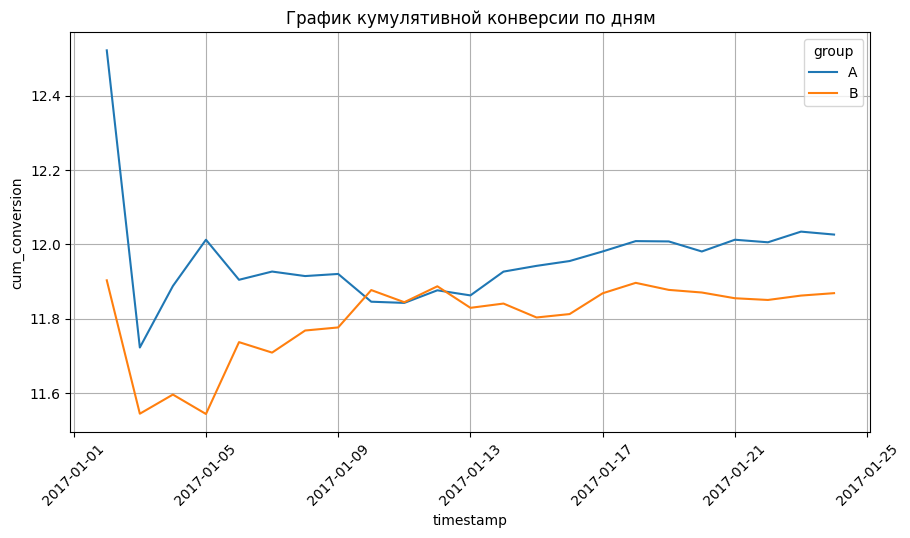

In [ ]:
# А теперь построим графики кумулятивной конверсии по дням в каждой группе:

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

До 2017-01-09 конверсия была нестабильна, но после 2017-01-11 резкие скачки прекратились (кривая графика переходит в прямую). Судя по графику, конверсия группы B стабильно хуже конверсии группы А на всём промежутке времени.

На основании стабилизированного кумулятивного графика мы можем сделать вывод, что длительность эксперимента была достаточной для того, чтобы судить о статистической значимости разности между показателем конверсии в группах.

### Статистический тест для конверсии

Оказывается, интересующий нас признак того, осуществлена конверсия пользователя или нет, — это случайная величина, имеющая распределение Бернулли. Такая случайная величина имеет два возможных исхода:

* успех (1) — пользователь осуществил конверсию (совершил целевое действие);
* неуспех (0) — пользователь не осуществил конверсию.

**конверсия** — это доля (пропорция) пользователей, которые добавили сопутствующий товар в корзину. То есть истинная конверсия — вероятность «успеха», или вероятность того, что пользователь совершит целевое действие.

Для проверки гипотезы равенства пропорций мы можем воспользоваться уже знакомым нам z-критерием для пропорций. Этот критерий является наиболее популярным для задачи определения статистической значимости изменения конверсии.

Нулевая гипотеза нашего теста всегда будет звучать следующим образом:

*  истинные пропорции в группах равны.


А вот альтернативных может быть несколько:

* (двусторонняя):  истинные пропорции в группах не равны.
* (левосторонняя):  истинная пропорция группы А меньше, чем в группе B.
* (правосторонняя):  истинная пропорция группы А больше, чем в группе B.


 Применим z-тест для пропорций на примере конверсии нашего интернет-магазина.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

* count — количество «успехов» (в каждой из групп). В нашем случае — количество пользователей, которые совершили целевое действие в каждой группе.
* nobs — количество наблюдений (в каждой из групп), то есть размер выборки.
* alternative — альтернативная гипотеза. Может быть: 'two-sided' — двусторонняя, 'smaller' — левосторонняя, 'larger' — правосторонняя. По умолчанию параметр равен 'two-sided'.

In [ ]:
# сгруппируем данные по признаку группы и рассчитаем количество «успехов»
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


будем проверять следующую новую гипотезу:
*   конверсии в группах А и B равны.

При правосторонней альтернативной гипотезе (ранее из кумулятивных графиков мы видели, что кумулятивная конверсия в группе А выше, чем в группе B, поэтому мы хотим удостовериться в этом с помощью статистического теста, и нам подойдёт правосторонняя гипотеза):
*  конверсия в группе А выше, чем конверсия в группе B.


Зададим уровень значимости  и будем сравнивать полученное p-value с ним. По умолчанию функция proportions_ztest() возвращает z-статистику и p-value для двусторонней альтернативной гипотезы (конверсии в группах не равны).



In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'

alpha = 0.05 # уровень значимости

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)

# выводим результат на экран
print('p-value: ', round(p_value, 2))

# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


**Что это значит для нас и для бизнеса?** Так как z-тест для пропорций показал, что истинные значения конверсий в группах равны (с уровнем значимости 0.05), то полученная разница в метрике в группах статистически не значима. Переводим на язык бизнеса: разницы между вариантами рекомендаций сопутствующих товаров нет — они одинаково эффективны по метрике конверсии!

Заметим, что, если повысить уровень значимости до 0.1 , то есть «ослабить» требование по точности, можно получить уровень конверсии в группе А, всё-таки превышающий конверсию в группе B.

Таким образом, при уровне значимости 0.1 гипотеза о равенстве конверсий всё же отвергается. В таком случае считается, что первая версия рекомендаций лучше, чем вторая версия.



**Какой уровень значимости выбрать?**

Стараются придерживаться уровней значимости 0.05 . Помним, что больший уровень значимости подразумевает больший риск совершить ошибку I рода (отклонить верную нулевую гипотезу).

Вы сами определяете уровень значимости в зависимости от вашей гипотезы и того, сколько будет стоить вам ошибка I рода.

Как правило, если возникают спорные ситуации, то склоняются в пользу уже существующего варианта А, так как он не требует временных и денежных затрат на внедрение.
В нашем примере варианты А и B оказались равными по признаку конверсии при уровне значимости , однако при уровне значимости  вариант А оказывается более эффективным.

Так или иначе, немедленное внедрение варианта B — определённо не лучшая идея. Либо его необходимо доработать и провести тестирование заново, либо стоит отказаться от него вовсе.

На самом деле наша с вами задача об оценке эффективности двух вариантов была очень упрощена. Мы с вами рассматривали только одну метрику — конверсию добавления в корзину. Но на деле обычно смотрят на несколько показателей в комплексе!

Помимо конверсии, нужно рассматривать и другие метрики, например средний чек. Возможно же такое, что конверсия в группах одинаковая, а вот средние чеки существенно различаются!

В таком случае проводятся статистические тесты для обеих метрик, и решение принимается в пользу варианта, который эффективнее по более приоритетной метрике (например, если мы хотим повысить прибыль, это будет средний чек).


Что делать с другими метриками?
Мы выполняем аналогичные действия: проводим визуальный анализ показателей, смотрим на кумулятивные графики, проводим статистический тест (строим доверительный интервал) и определяем статистическую значимость разницы в показателях.

**Но это уже другая история....**